In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
%matplotlib inline
import imp
plt.style.use('seaborn-darkgrid')
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from numpy.linalg import svd
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF
from os import listdir

In [421]:
import src.LC_Clean_Assist as LCC
import src.LC_Plotter as LCP
import src.LC_Transformer as LCT
import src.LC_Models as LCM
imp.reload(LCP)
imp.reload(LCC)
imp.reload(LCT)
imp.reload(LCM)

<module 'src.LC_Models' from '/Users/adamricks/Documents/Galvanize/Capstone2/lending-club/src/LC_Models.py'>

Reduce Loan dataset to 100k loans

Balanced Train Set

Imbalanced Test Set

In [5]:
df = pd.read_csv('data/LC_Compiled.csv',low_memory=False)
df = LCC.clean_lc_for_plotting(df)

In [6]:
df = LCC.clean_lc_for_models(df)
df.to_csv('data/cleaned_data.csv',index=False)



In [372]:
df=pd.read_csv('data/cleaned_data.csv')


In [413]:
scaled_df = LCT.lc_transform(df)
rfc = RandomForestClassifier()
output_df = LCM.lc_mult_evaluate(scaled_df,rfc)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Testing with proportion 0.01




/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[[ 31003      1]
 [125990     13]]


accuracy: 0.19754533237371583
precision: 0.9285714285714286
Return: 1.0
Testing with proportion 0.13458333333333333


[[ 30729    275]
 [119765   6238]]


accuracy: 0.23544810104008101
precision: 0.9577767541839398
Return: 6.5
Testing with proportion 0.25916666666666666


[[ 29875   1129]
 [109005  16998]]


accuracy: 0.29854082938977244
precision: 0.9377172174104926
Return: 6.6
Testing with proportion 0.38375000000000004


[[28698  2306]
 [97728 28275]]


accuracy: 0.3628691714382161
precision: 0.9245937019718126
Return: 6.7
Testing with proportion 0.5083333333333333


[[27275  3729]
 [87912 38091]]


accuracy: 0.4163253867661951
precision: 0.9108321377331421
Return: 6.8
Testing with proportion 0.6329166666666667


[[25864  5140]
 [78748 47255]]


accuracy: 0.46570535071684704
precision: 0.9018990361675733
Return: 6.6
Testing with proportion 0.7575000000000001


[[24464  6540]
 [70757 55246]]


accuracy: 0.5076843707605393
precision: 0.894150778493

In [415]:
output_df

,Proportions,Accuracy,Precision,Returns
0,0.010000,0.197545,0.928571,1.0
1,0.134583,0.235448,0.957777,6.5
2,0.259167,0.298541,0.937717,6.6
3,0.383750,0.362869,0.924594,6.7
4,0.508333,0.416325,0.910832,6.8
5,0.632917,0.465705,0.901899,6.6
6,0.757500,0.507684,0.894151,6.5
7,0.882083,0.542339,0.885932,6.5
8,1.006667,0.574439,0.880501,6.2
9,1.131250,0.601209,0.875009,6.3


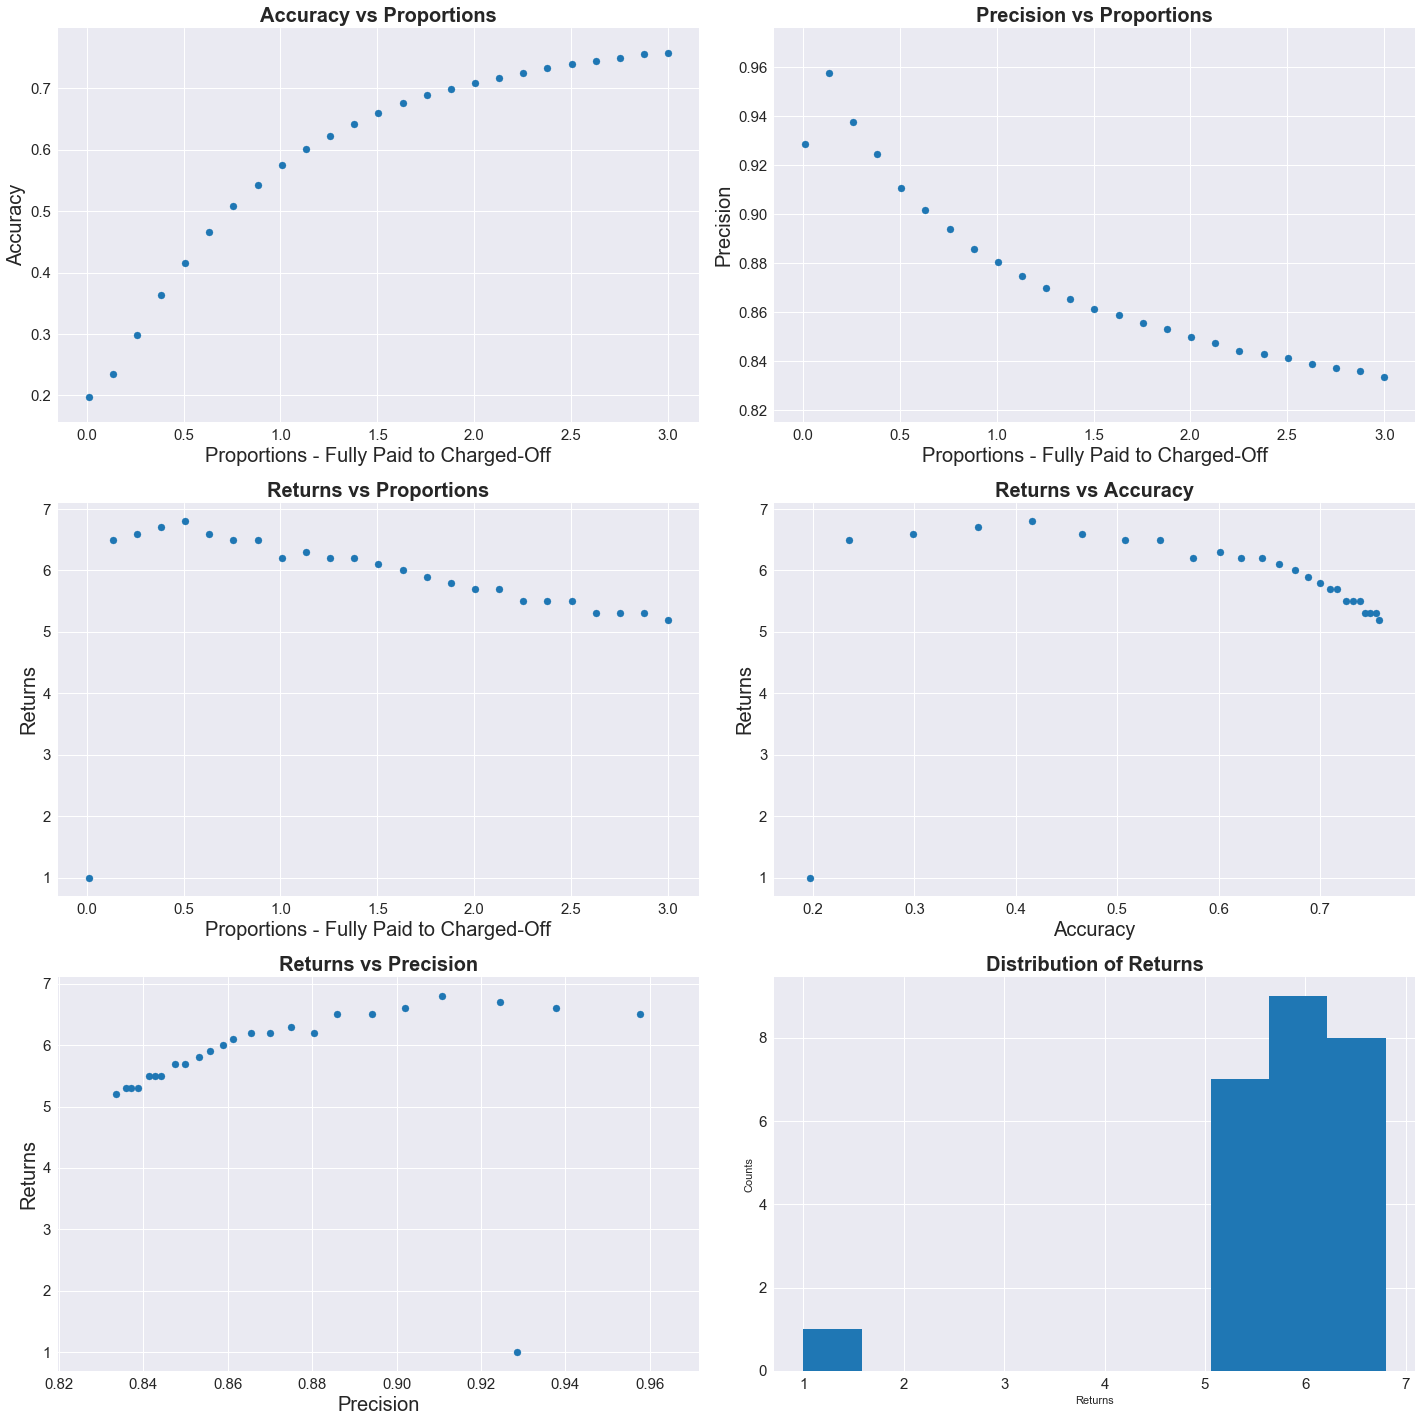

In [419]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3,2,1)
ax1.scatter(output_df['Proportions'],output_df['Accuracy'])
ax1.tick_params('x',labelsize=15)
ax1.tick_params('y',labelsize=15)
plt.xlabel('Proportions - Fully Paid to Charged-Off',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Accuracy vs Proportions',fontsize=20,fontweight='bold')
ax2 = fig.add_subplot(3,2,2)
ax2.scatter(output_df['Proportions'],output_df['Precision'])
ax2.tick_params('x',labelsize=15)
ax2.tick_params('y',labelsize=15)
plt.ylabel('Precision',fontsize=20)
plt.xlabel('Proportions - Fully Paid to Charged-Off',fontsize=20)
plt.title('Precision vs Proportions',fontsize=20,fontweight='bold')
ax3 = fig.add_subplot(3,2,3)
ax3.scatter(output_df['Proportions'],output_df['Returns'])
ax3.tick_params('x',labelsize=15)
ax3.tick_params('y',labelsize=15)
plt.xlabel('Proportions - Fully Paid to Charged-Off',fontsize=20)
plt.ylabel('Returns',fontsize=20)
plt.title('Returns vs Proportions',fontsize=20,fontweight='bold')
ax4 = fig.add_subplot(3,2,4)
ax4.scatter(output_df['Accuracy'],output_df['Returns'])
ax4.tick_params('x',labelsize=15)
ax4.tick_params('y',labelsize=15)
plt.xlabel('Accuracy',fontsize=20)
plt.ylabel('Returns',fontsize=20)
plt.title('Returns vs Accuracy',fontsize=20,fontweight='bold')
ax5 = fig.add_subplot(3,2,5)
ax5.scatter(output_df['Precision'],output_df['Returns'])
ax5.tick_params('x',labelsize=15)
ax5.tick_params('y',labelsize=15)
plt.xlabel('Precision',fontsize=20)
plt.ylabel('Returns',fontsize=20)
plt.title('Returns vs Precision',fontsize=20,fontweight='bold')
ax6 = fig.add_subplot(3,2,6)
ax6.hist(output_df['Returns'])
ax6.tick_params('x',labelsize=15)
ax6.tick_params('y',labelsize=15)
plt.xlabel('Returns')
plt.ylabel('Counts')
plt.title('Distribution of Returns',fontsize=20,fontweight='bold')
plt.tight_layout()

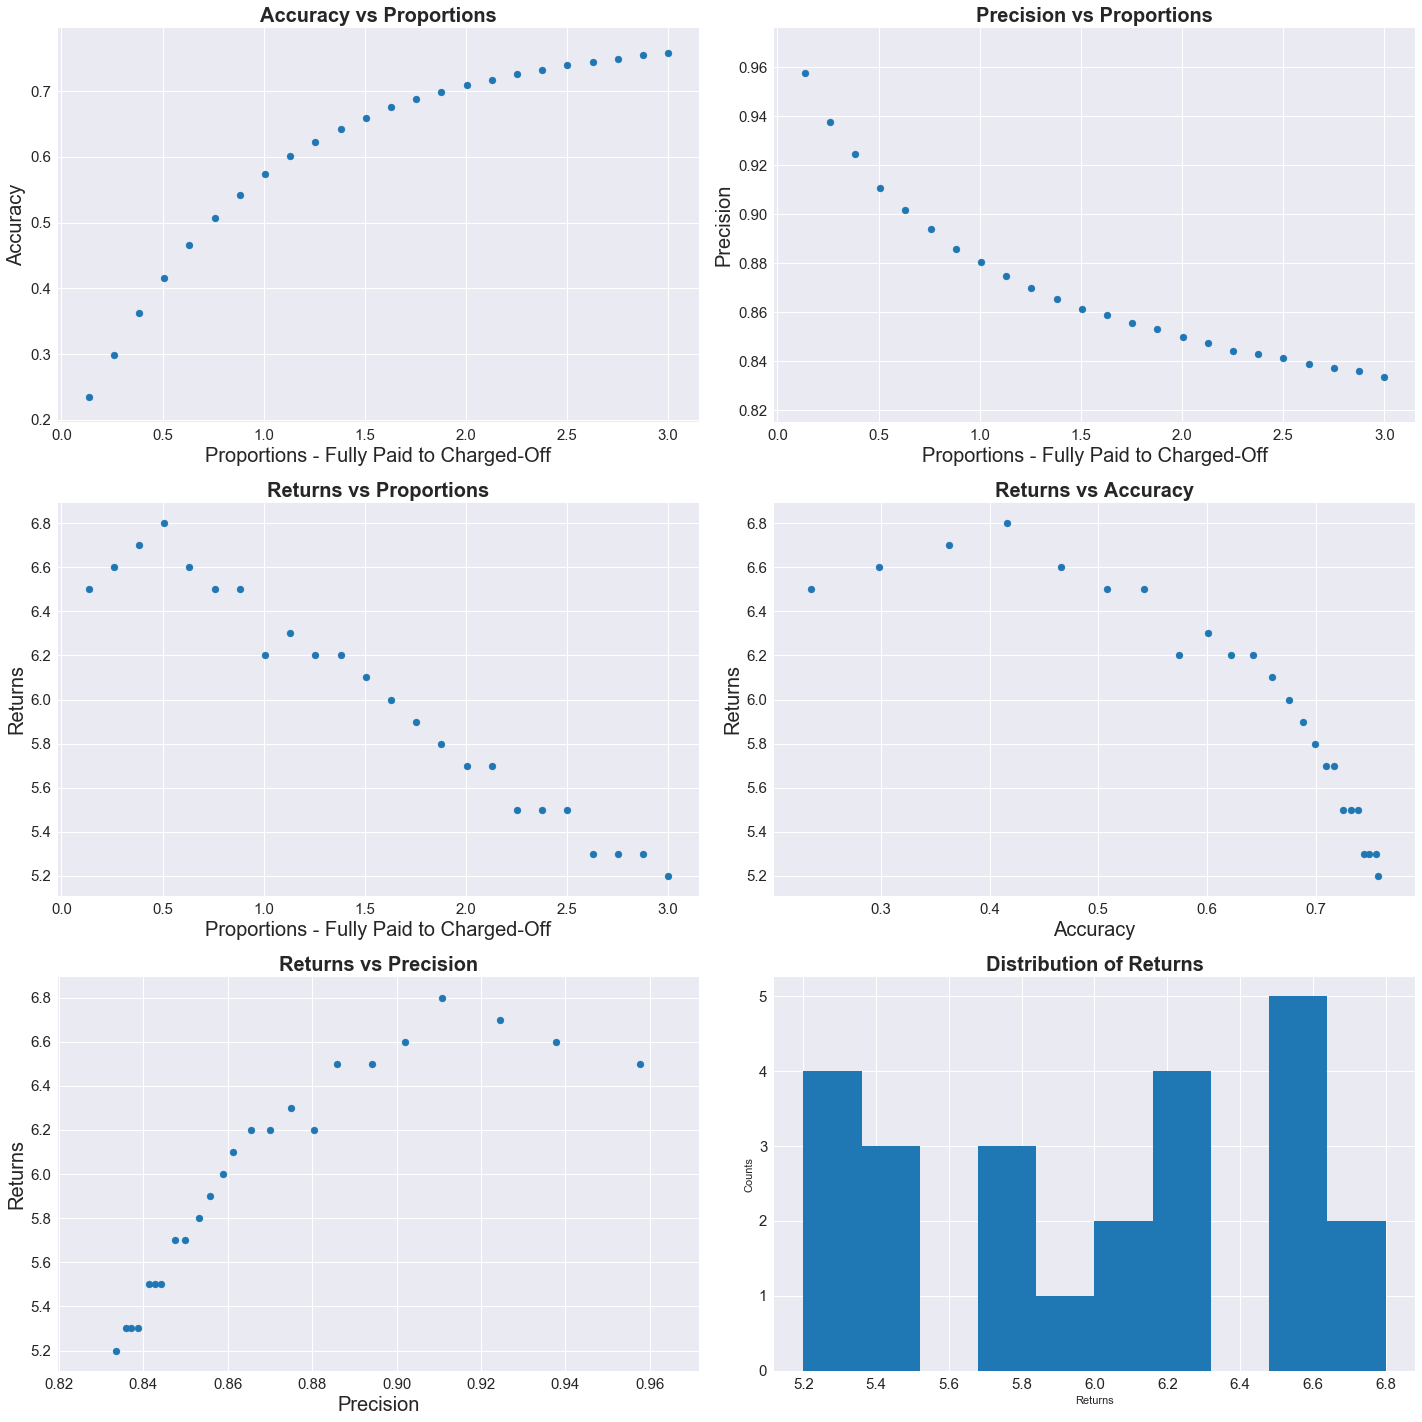

In [422]:
LCP.lc_choose_proportion(output_df)
plt.tight_layout()

In [ ]:
X_train, X_test, y_train, y_test, train_loan_data, test_loan_data = LCT.lc_transform(scaled_df,0.5)